<a href="https://colab.research.google.com/github/mgoncerz/ml_zaliczenie_projekt/blob/master/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The idea is to compare the accuracy of various ML methods in reckognizing handwritten letters from alphabets of different complexity.

Loading libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties

import pandas as pd

import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils.vis_utils import plot_model
from IPython.display import Image 

Using TensorFlow backend.


Hiragana:

1. Loading data (https://www.kaggle.com/anokas/kuzushiji):

In [0]:
images_train = np.load('kmnist-train-imgs.npz')['arr_0']
images_test = np.load('kmnist-test-imgs.npz')['arr_0']

x_train = images_train.reshape(len(images_train), 28*28).astype('float32')
x_test = images_test.reshape(len(images_test), 28*28).astype('float32')

labels_train = np.load('kmnist-train-labels.npz')['arr_0']
labels_test = np.load('kmnist-test-labels.npz')['arr_0']

y_train = keras.utils.to_categorical(labels_train, 10)
y_test = keras.utils.to_categorical(labels_test, 10)

labels_map = pd.read_csv("kmnist_classmap.csv", encoding="utf-8")

2. Ploting selected samples from input data:

   index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を


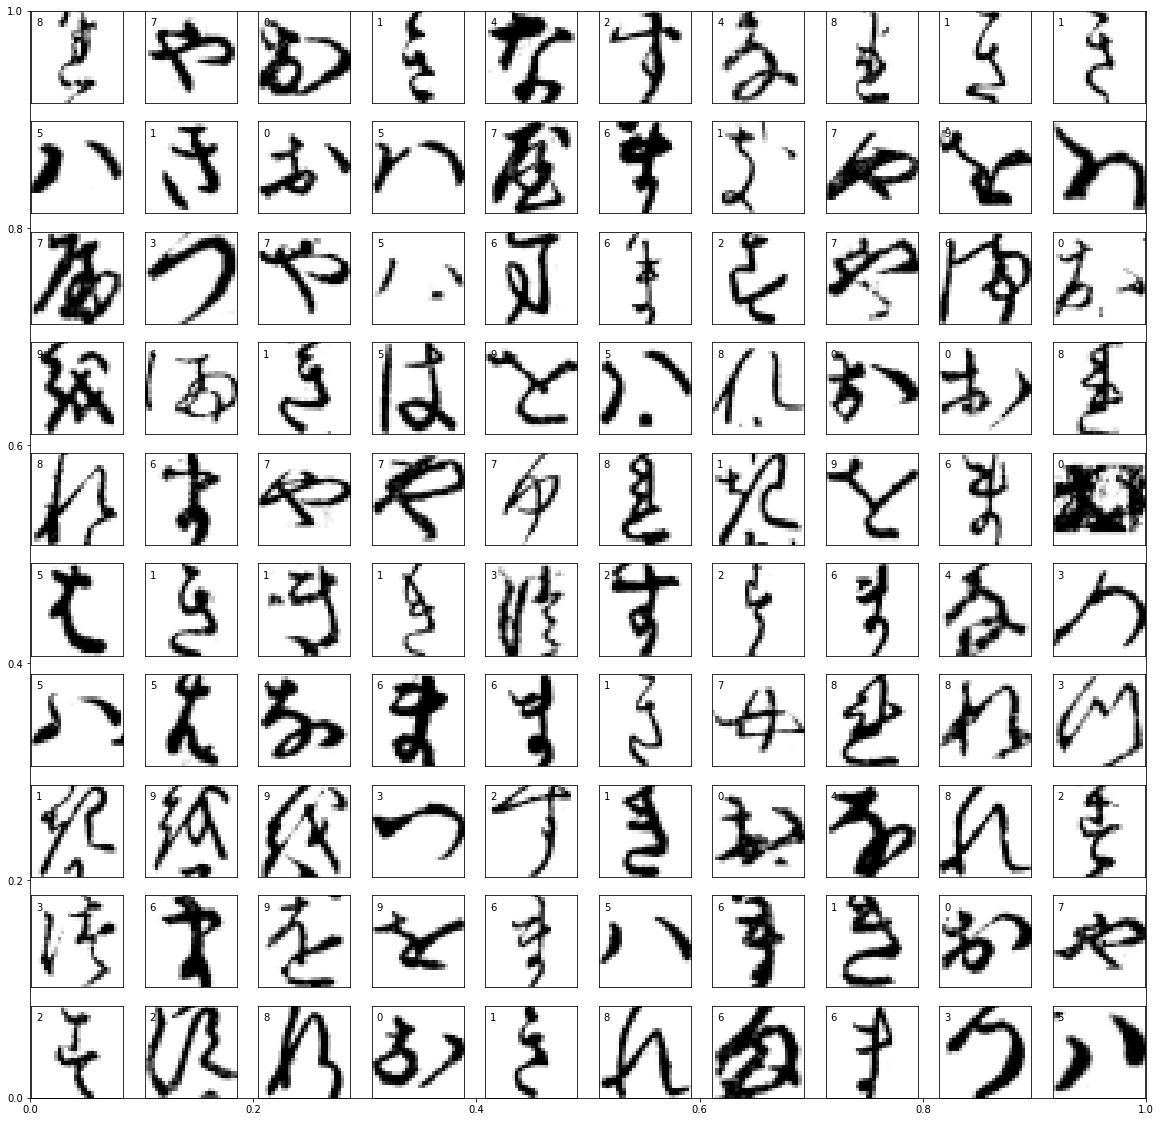

In [4]:
print(labels_map)

fig, axes = plt.subplots(figsize=(20,20))

for i in range(100):
    ax = fig.add_subplot(10,10,i+1,xticks=[], yticks=[])
    ax.imshow(images_train[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(1, 4, str(labels_train[i]))

3. Simple approach:
